In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

import pickle

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
duplicate = df [df.duplicated()]
duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df.quality = np.where(df.quality >= 7, 1, 0)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


<AxesSubplot:xlabel='quality', ylabel='count'>

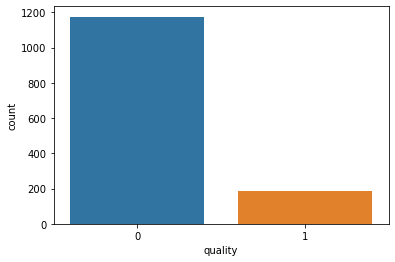

In [12]:
sns.countplot(x='quality',data=df)

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


There are no null values<br>
There is high jump from 75% to max in residual sugar,chlorides,free sulfur dioxide and total sulfur dioxide, so there might be outliers

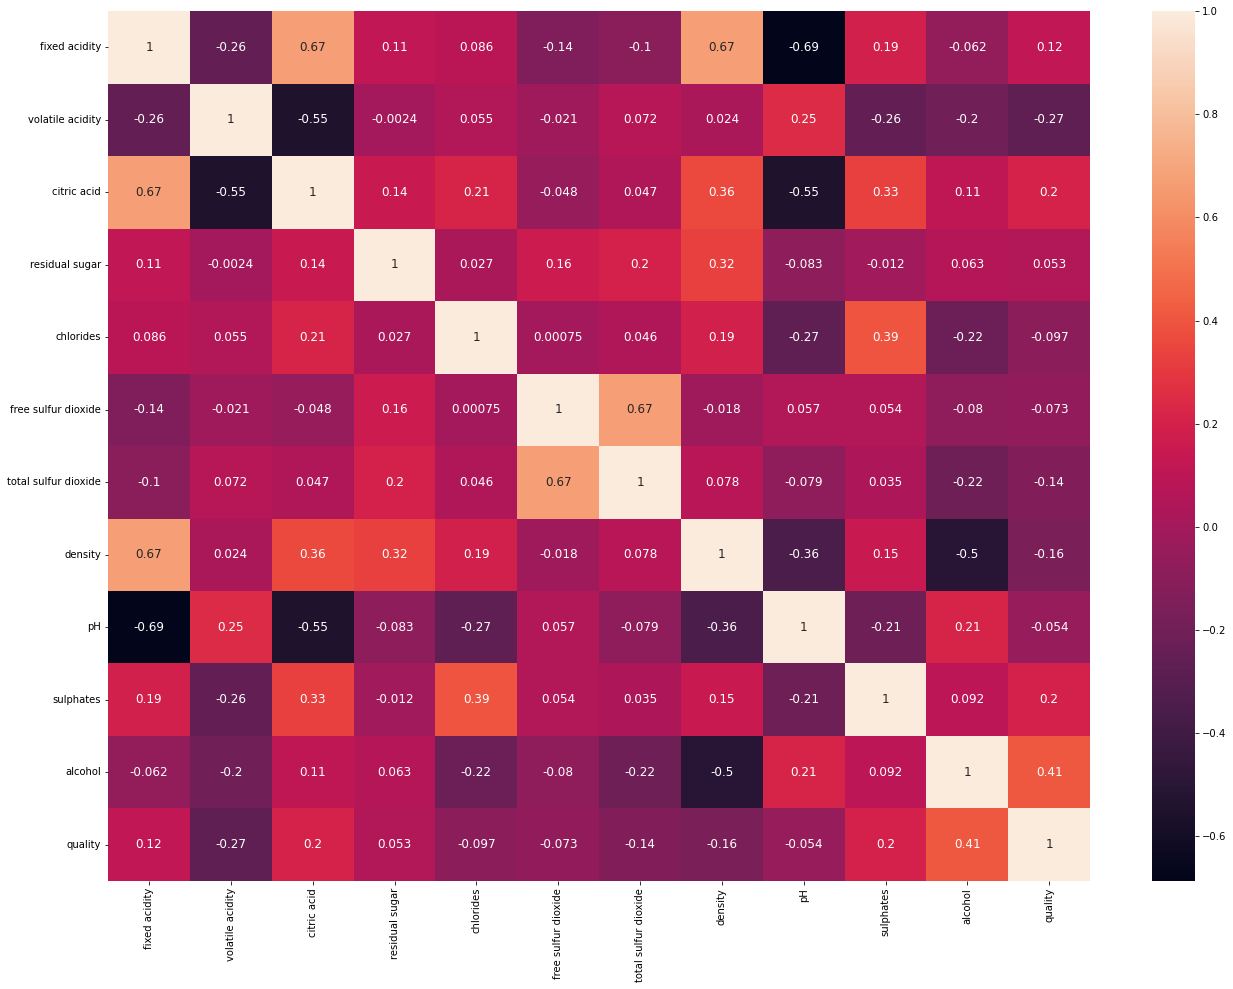

In [14]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df.corr()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()

From the above heatmap we can observe that the below features are correlated :<br>
    fixed acidity and density<br>
    fixed acidity and citric acid<br>
    total sulfur dioxide and free sulfur dioxide<br>

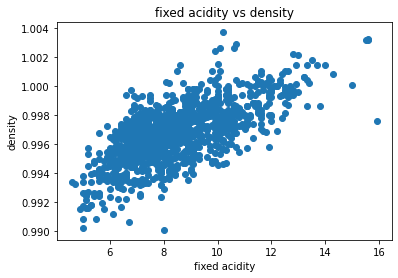

In [15]:
# Check if they are really related
plt.scatter(df['fixed acidity'],df['density'])
plt.xlabel('fixed acidity')
plt.ylabel('density')
plt.title('fixed acidity vs density')
plt.show()

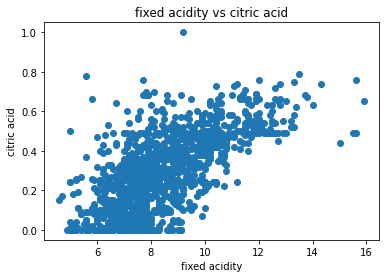

In [16]:
# Check if they are really related
plt.scatter(df['fixed acidity'],df['citric acid'])
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.title('fixed acidity vs citric acid')
plt.show()

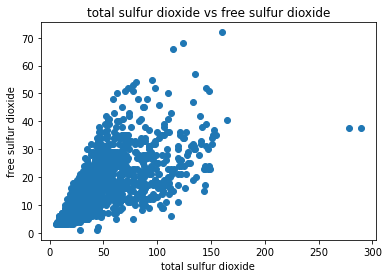

In [17]:
# Check if they are really related
plt.scatter(df['total sulfur dioxide'],df['free sulfur dioxide'])
plt.xlabel('total sulfur dioxide')
plt.ylabel('free sulfur dioxide')
plt.title('total sulfur dioxide vs free sulfur dioxide')
plt.show()

From the above 3 scatter plots we could see some trend which looks like the features are related<br>
Now we shall observe which features to delete by checking how they are related to label<br>
fixed acidity is having 0.12 correlation with quality and density is having -0.15 correlation with quality so density is less correlated with the label<br>
fixed acidity is having 0.12 correlation with quality and citric acid is having 0.21 correlation with the quality so fixed acidity is less correlated with the label compared to citric acid<br>
free sulfur dioxide is having -0.072 correlation with quality and total sulfur dioxide is having -0.14 correlation with quality so free sulfur dioxide is less correlated with the label<br>
We can delete the columns density, fixed acidity and free sulfur dioxide

In [18]:
df = df.drop(columns=['density','fixed acidity','free sulfur dioxide'])

In [19]:
df

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...
1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [20]:
# We shall reconfirm the correlation and reduce multicollinearity if still exists using the technique vif
# Scale the data
x = df.drop(columns=['quality'])
y = df['quality']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled.shape[1]

8

In [21]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.595065,volatile acidity
1,2.151443,citric acid
2,1.087138,residual sugar
3,1.396949,chlorides
4,1.118282,total sulfur dioxide
5,1.630684,pH
6,1.367872,sulphates
7,1.300674,alcohol


So it looks fine,vif for all the columns are not high since we have already dropped correlated features manually

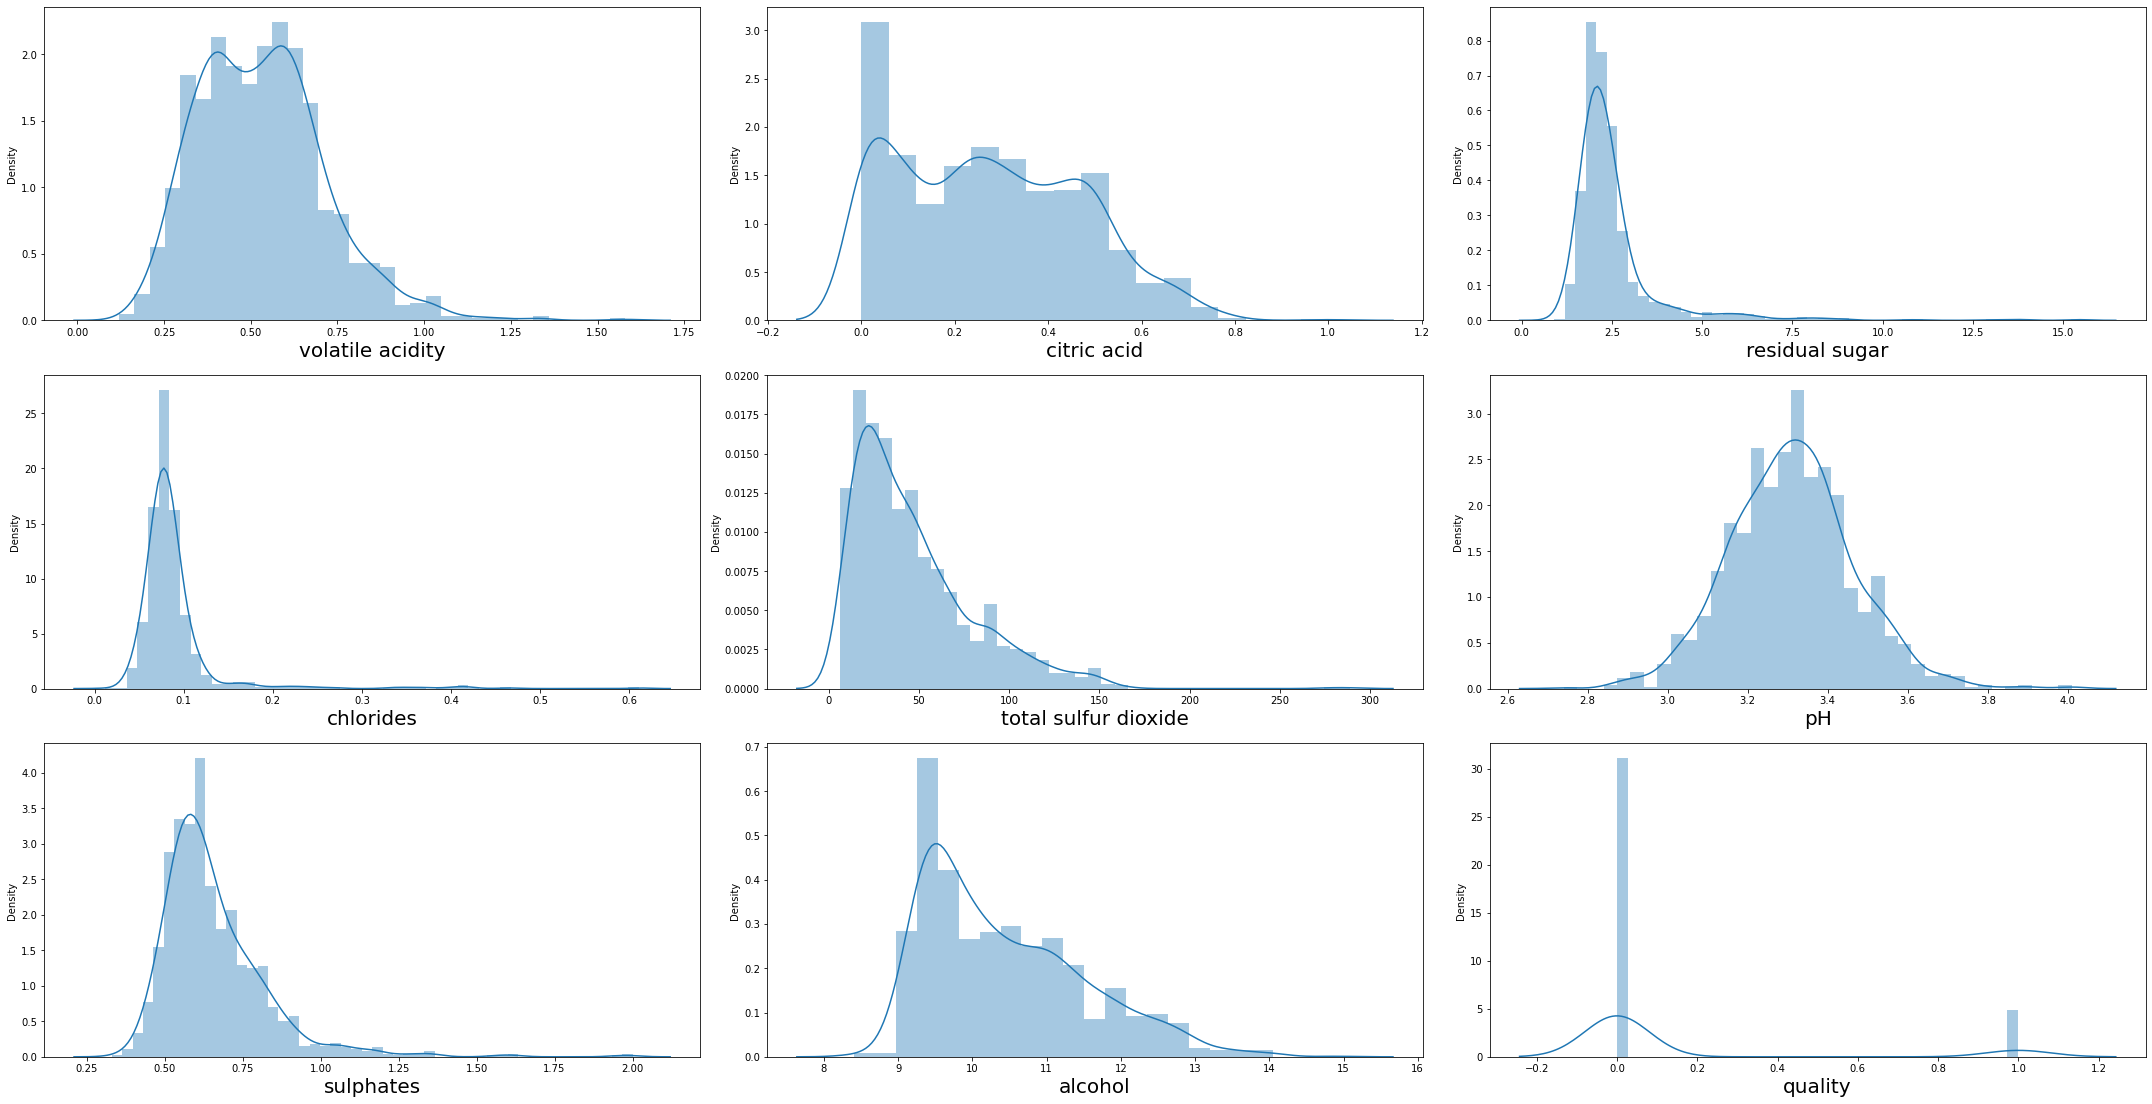

In [22]:
# check data distribution
plt.figure(figsize=(30,20))
n = 1
for col in df:
    if n<=12:
        ax = plt.subplot(4,3,n)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    n+=1
plt.tight_layout()

From the above distribution plots we can observe there exists some skewness in almost all the columns

From the distribution plot we got to know that some skewness exists in the columns so we shall visualize the outliers using boxplot

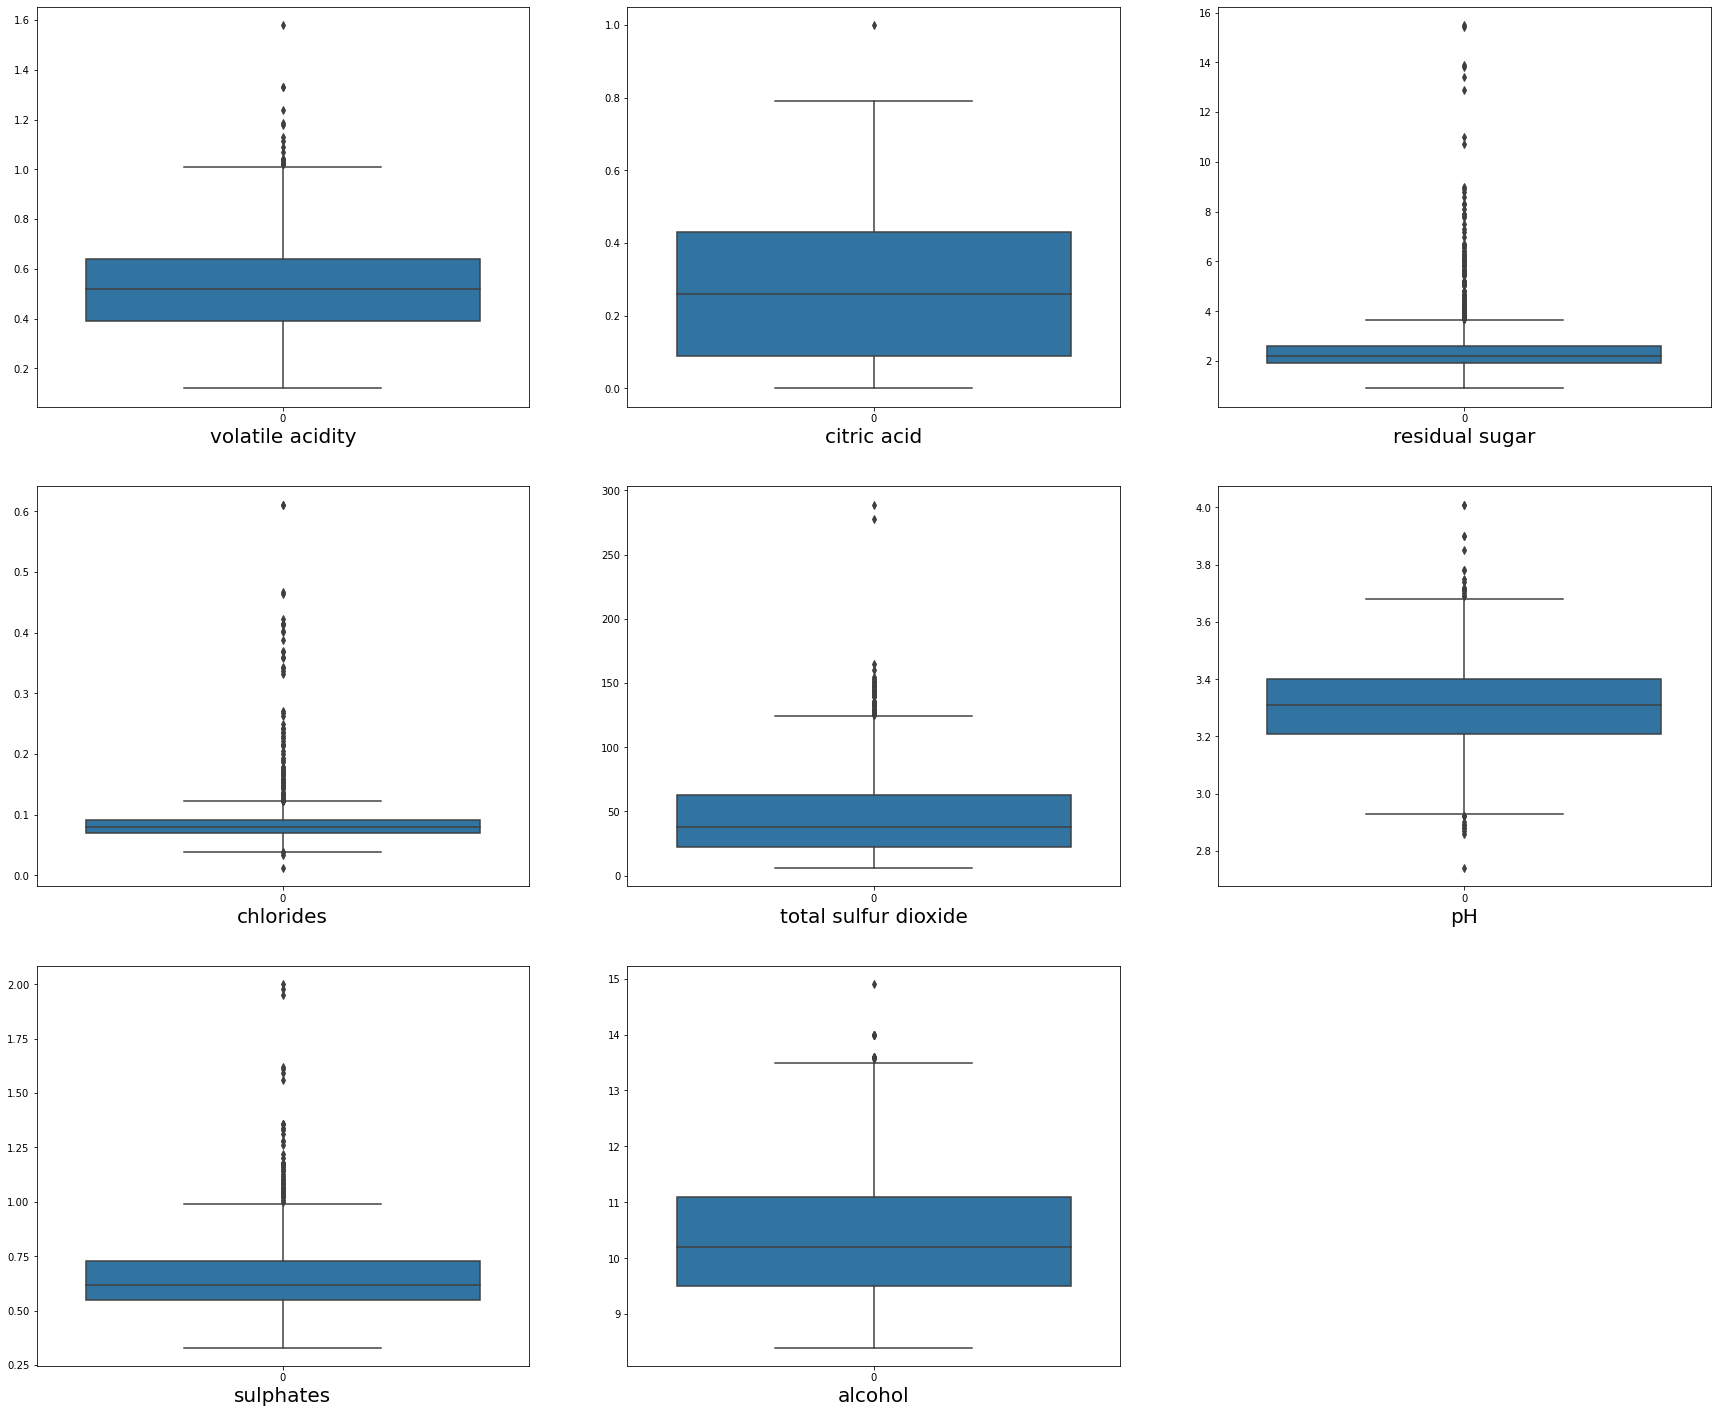

In [23]:
plt.figure(figsize=(30,25))
n=1
for col in df:
    if n<=8:
        ax=plt.subplot(3,3,n)
        sns.boxplot(data=df[col],orient='v')
        plt.xlabel(col,fontsize=20)
    n+=1
plt.show()

Observed more outliers in all the features except in citric acid where i could see less outlier, we shall remove the skewness using iqr method

In [24]:
df = df.set_axis(['volatile_acidity','citric_acid','residual_sugar','chlorides','total_sulfur_dioxide','pH','sulphates','alcohol',
                  'quality'], axis=1)
 
df

,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...
1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [25]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

In [26]:
c_low = (q1.chlorides-(1.5*iqr.chlorides))
print(c_low)
index = np.where(df['chlorides'] < c_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.03850000000000002
(1355, 9)


,index,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
4,5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1350,1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1351,1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1352,1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1353,1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [27]:
pH_low = (q1.pH-(1.5*iqr.pH))
print(pH_low)
index = np.where(df['pH'] < pH_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

2.925
(1344, 9)


,index,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
4,5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1339,1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1340,1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1341,1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1342,1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [28]:
va_high = (q3.volatile_acidity+(1.5*iqr.volatile_acidity))
print(va_high)
index = np.where(df['volatile_acidity'] > va_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

1.0150000000000001
(1325, 9)


,index,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
4,5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1320,1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1321,1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1322,1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1323,1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [29]:
rs_high = (q3.residual_sugar+(1.5*iqr.residual_sugar))
print(rs_high)
index = np.where(df['residual_sugar'] > rs_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

3.6500000000000004
(1203, 9)


,index,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
4,5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1198,1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1199,1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1200,1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1201,1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [30]:
c_high = (q3.chlorides+(1.5*iqr.chlorides))
print(c_high)
index = np.where(df['chlorides'] > c_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.12249999999999998
(1137, 9)


,index,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
4,5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1132,1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1133,1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1134,1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1135,1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [31]:
tsd_high = (q3.total_sulfur_dioxide+(1.5*iqr.total_sulfur_dioxide))
print(tsd_high)
index = np.where(df['total_sulfur_dioxide'] > tsd_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

124.5
(1104, 9)


,index,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
4,5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1099,1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1100,1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1101,1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1102,1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [32]:
pH_high = (q3.pH+(1.5*iqr.pH))
print(pH_high)
index = np.where(df['pH'] > pH_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

3.6849999999999996
(1090, 9)


,index,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
4,5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1085,1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1086,1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1087,1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1088,1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [33]:
s_high = (q3.sulphates+(1.5*iqr.sulphates))
print(s_high)
index = np.where(df['sulphates'] > s_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.9999999999999999
(1069, 9)


,index,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
4,5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1064,1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1065,1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1066,1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1067,1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


In [34]:
a_high = (q3.alcohol+(1.5*iqr.alcohol))
print(a_high)
index = np.where(df['alcohol'] > a_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

13.5
(1062, 9)


,index,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
1,1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,0
2,2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
3,3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,0
4,5,0.660,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1057,1593,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,0
1058,1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,0
1059,1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,0
1060,1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,0


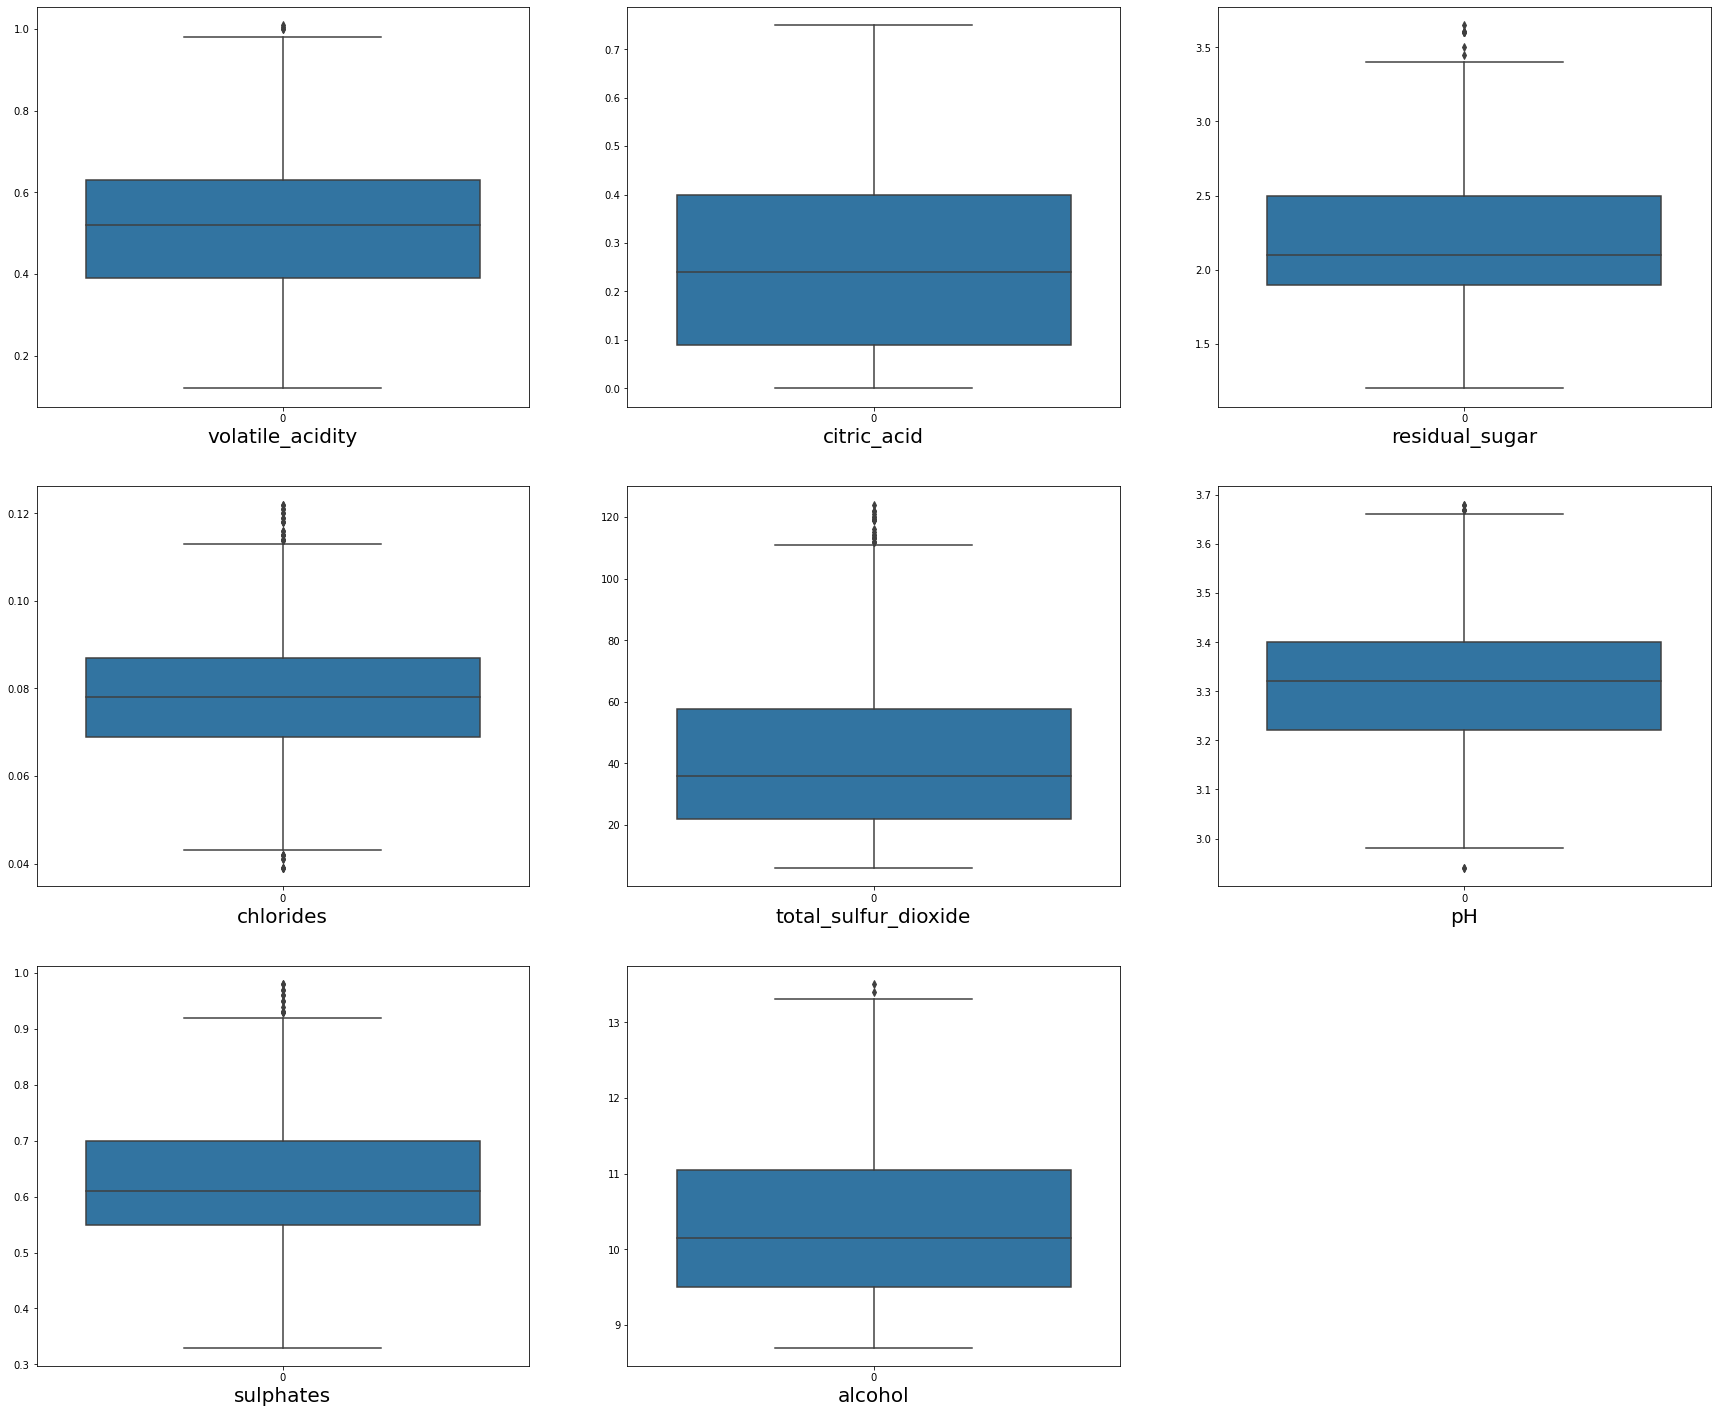

In [35]:
#Let us see the boxplot after removing skewness
plt.figure(figsize=(30,25))
n=1
for col in df:
    if n<=8:
        ax=plt.subplot(3,3,n)
        sns.boxplot(data=df[col],orient='v')
        plt.xlabel(col,fontsize=20)
    n+=1
plt.show()

Now it looks much better

In [36]:
#Split the data into 2 parts using Hold Out method
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=350)

Since the label is of binary classification data let us train the models below which are suitable for classification data:<br>
    LogisticRegression
    KNN
    Decision-Tree

In [37]:
# model instantiation with default parameters
lr = LogisticRegression()

In [38]:
# Train the model
lr.fit(x_train,y_train)

LogisticRegression()

In [57]:
# save the model to disk
filename = 'WineQuality_PracticeProject_LR_model.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [43]:
# Predict the test data
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [44]:
accuracy_lr = accuracy_score(y_test,y_pred_lr)
accuracy_lr

0.8970588235294118

In [45]:
conf_matrix_lr = confusion_matrix(y_test,y_pred_lr)
conf_matrix_lr

array([[292,   7],
       [ 28,  13]], dtype=int64)

In [46]:
Accuracy_lr = (conf_matrix_lr[0][0]+conf_matrix_lr[1][1])/(conf_matrix_lr[0][0]+conf_matrix_lr[0][1]+conf_matrix_lr[1][0]+conf_matrix_lr[1][1])
Accuracy_lr

0.8970588235294118

In [47]:
precision_lr = conf_matrix_lr[0][0]/(conf_matrix_lr[0][0]+conf_matrix_lr[0][1])
precision_lr

0.9765886287625418

In [48]:
recall_lr = conf_matrix_lr[0][0]/(conf_matrix_lr[0][0]+conf_matrix_lr[1][0])
recall_lr

0.9125

In [49]:
f1_score_lr = 2*(recall_lr*precision_lr)/(recall_lr+precision_lr)
f1_score_lr

0.9434571890145397

In [50]:
auc_lr = roc_auc_score(y_test,y_pred_lr)
auc_lr

0.6468308997471246

In [51]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,y_pred_lr)
print(fpr_lr)
print(tpr_lr)
print(thresholds_lr)

[0.         0.02341137 1.        ]
[0.         0.31707317 1.        ]
[2 1 0]


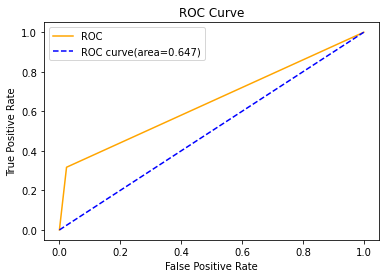

In [52]:
plt.plot(fpr_lr,tpr_lr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='blue',linestyle='--',label="ROC curve(area=%0.3f)"%auc_lr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [53]:
# Cross vaidation to see if LogisticRegression model is overfitting
cross_val_score(lr,x_scaled,y,cv=10).mean()

0.8749237472766884

The LogisticRegression model is not overfitting the accuracy is almost same 

In [54]:
# model instantiation with default parameters
knn = KNeighborsClassifier()

In [55]:
# Train the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [58]:
# save the model to disk
filename = 'WineQuality_PracticeProject_KNN_model.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [59]:
# Predict the test data
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [60]:
cfm = confusion_matrix(y_test,y_pred_knn)
cfm

array([[277,  22],
       [ 24,  17]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred_knn,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       299
           1       0.44      0.41      0.43        41

    accuracy                           0.86       340
   macro avg       0.68      0.67      0.67       340
weighted avg       0.86      0.86      0.86       340



In [62]:
# Cross vaidation to see if KNN model is overfitting
cross_val_score(knn,x_scaled,y,cv=10).mean()

0.8594716775599128

The KNN model is not overfitting the accuracy is almost same

In [63]:
# DT model instantiation with default parameters
dt = DecisionTreeClassifier()

In [64]:
# Train the model
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
# save the model to disk
filename = 'WineQuality_PracticeProject_DT_model.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [66]:
# Predict the test data
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [67]:
dt.score(x_train,y_train)

1.0

In [68]:
accuracy_score(y_test,y_pred_dt)

0.8176470588235294

So the Decision-Tree model understood 100% and predicting with 88.59 confidence with default parameters

In [69]:
#Hyperparamter tuning to see if occuracy increase
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,8),
    'min_samples_split':range(3,8)
}

In [70]:
grid_search = GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [71]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(3, 8)})

In [72]:
best_params=grid_search.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 6}


In [73]:
dt_ht = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf=7,min_samples_split=6)

In [74]:
dt_ht.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=7, min_samples_split=6)

In [75]:
y_pred_dt_ht = dt_ht.predict(x_test)

In [76]:
accuracy_score(y_test,y_pred_dt_ht)

0.8676470588235294

The occuracy is increased after tuning the parameters from 81.7 to 86.7

In [77]:
# Cross vaidation to see if Decision-Tree model is overfitting
cross_val_score(dt_ht,x_scaled,y,cv=10).mean()

0.8660947712418302

The KNN model is not overfitting the accuracy is almost same